<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.wealthandfinance-news.com/wp-content/uploads/2020/10/stocks.jpg" width="500px" height="400px" />

# 3. Cálculo de los rendimientos

**Objetivos**
- Descarcar precios de yahoo finance para su posterior análisis.
- Estudiar el concepto de rendimiento simple y rendimiento logarítmico.
- Estudiar diversos gráficos útiles para los gráficos de rendimientos.

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, la fórmula anterior se puede implementar para todos los precios de cierre de manera simultánea mediante

In [1]:
# Librerías a utilizar
import yfinance as yf
from pandas_datareader import data as pdr
import numpy as np
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader.data as web
pd.set_option('display.max_rows', 10)

In [2]:
yf.pdr_override() 

# download dataframe
data = pdr.get_data_yahoo(["SPY", 'AAPL'], start="2017-01-01", end="2017-04-30")
data['Adj Close']

[*********************100%***********************]  2 of 2 completed


,AAPL,SPY
Date,,
2017-01-03,26.989267,199.200638
2017-01-04,26.959051,200.385727
2017-01-05,27.096155,200.226517
2017-01-06,27.398232,200.942886
2017-01-09,27.649185,200.279541
...,...,...
2017-04-24,33.521713,210.663940
2017-04-25,33.729408,211.889725
2017-04-26,33.531029,211.756439


In [5]:
def get_adj_closes(tickers, start_date=None, end_date=None, cols2return=None):
    
    if cols2return is not None:
        cols = cols2return
        flag_return_cols = True
    else:
        cols = ['Adj Close']
        flag_return_cols = False

    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.get_data_yahoo(tickers, start=start_date, end=end_date)[cols]

    # Renombrar las columnas en caso sólo que el paramétro cols2return sea no vacío
    if not flag_return_cols:
        if isinstance(tickers, (list, tuple, set)):
            if len(tickers) > 1:
                closes.columns = closes.columns.droplevel() 
            else:
                closes.columns = tickers
                
        elif isinstance(tickers, str):
            closes.columns = [tickers]

    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)

    return closes


[*********************100%***********************]  4 of 4 completed


<Axes: xlabel='Date'>

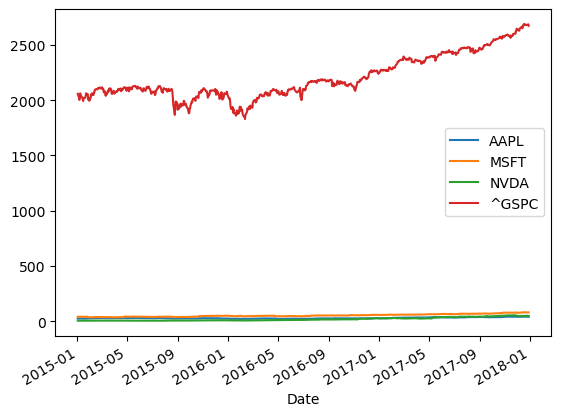

In [6]:
# Ejemplo: 'AAPL', 'MSFT', 'NVDA', '^GSPC'
ticker = ['AAPL', 'MSFT', 'NVDA', '^GSPC']
start = '2015-01-01'
end = '2017-12-31'
closes = get_adj_closes(tickers=ticker, start_date=start, end_date=end)
# pdr.get_data_yahoo(ticker, start=start, end=end)['Adj Close'].plot()
closes.plot()

In [31]:
closes

,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,24.498682,40.534851,4.833230,2058.199951
2015-01-05,23.808516,40.162098,4.751595,2020.579956
2015-01-06,23.810759,39.572620,4.607535,2002.609985
2015-01-07,24.144636,40.075401,4.595530,2025.900024
2015-01-08,25.072325,41.254353,4.768404,2062.139893
...,...,...,...,...
2017-12-22,41.427494,79.980324,48.307777,2683.340088
2017-12-26,40.376480,79.877434,48.844601,2680.500000
2017-12-27,40.383572,80.167358,48.777813,2682.620117


In [33]:
# Función shift 
closes.shift(1)

,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,24.498682,40.534851,4.833230,2058.199951
2015-01-06,23.808516,40.162098,4.751595,2020.579956
2015-01-07,23.810759,39.572620,4.607535,2002.609985
2015-01-08,24.144636,40.075401,4.595530,2025.900024
...,...,...,...,...
2017-12-22,41.427494,79.970924,48.461159,2684.570068
2017-12-26,41.427494,79.980324,48.307777,2683.340088
2017-12-27,40.376480,79.877434,48.844601,2680.500000


In [34]:
# Programar la función de rendimiento simple usando shift
(closes - closes.shift(1) )/ closes.shift(1)

,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.009196,-0.016890,-0.018278
2015-01-06,0.000094,-0.014677,-0.030318,-0.008893
2015-01-07,0.014022,0.012705,-0.002606,0.011630
2015-01-08,0.038422,0.029418,0.037618,0.017888
...,...,...,...,...
2017-12-22,0.000000,0.000118,-0.003165,-0.000458
2017-12-26,-0.025370,-0.001286,0.011113,-0.001058
2017-12-27,0.000176,0.003630,-0.001367,0.000791


Ya está implementada la fórmula para obtener cambios porcentuales

In [36]:
# Comparar los resultados con la función pct_change
Rall1 = closes.pct_change(1)
Rall1

,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.009196,-0.016890,-0.018278
2015-01-06,0.000094,-0.014677,-0.030318,-0.008893
2015-01-07,0.014022,0.012705,-0.002606,0.011630
2015-01-08,0.038422,0.029418,0.037618,0.017888
...,...,...,...,...
2017-12-22,0.000000,0.000118,-0.003165,-0.000458
2017-12-26,-0.025370,-0.001286,0.011113,-0.001058
2017-12-27,0.000176,0.003630,-0.001367,0.000791


y la gráfica de los mismos se puede obtener como

<Axes: xlabel='Date'>

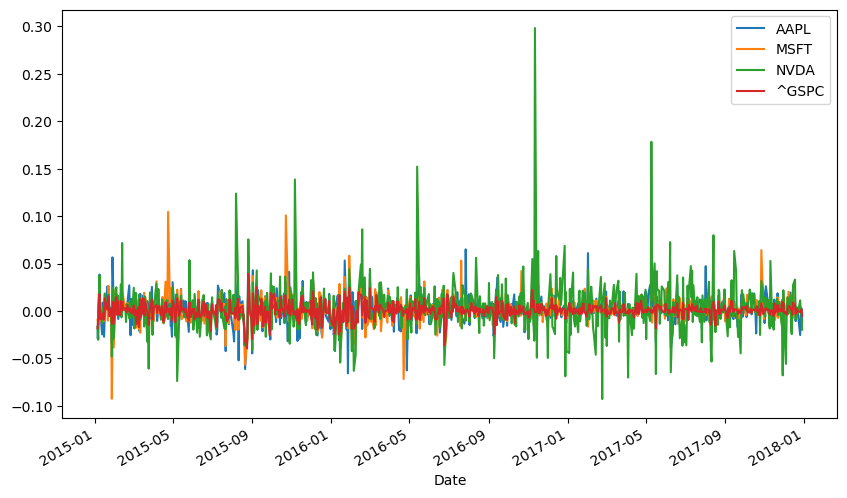

In [37]:
# Graficar los rendimientos simples
Rall1.plot(figsize=(10,6))

Donde se observa que el rendimiento tiene una tendencia mas o menos constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python.

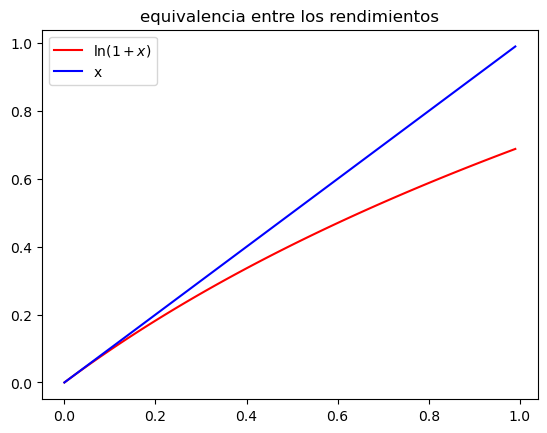

In [38]:
x = np.arange(0,1,0.01)
plt.plot(x,np.log(1+x),'r', label=r'$\ln(1+x)$')
plt.plot(x,x,'b', label='x')
plt.title('equivalencia entre los rendimientos')
plt.legend()
plt.show()

Por lo tanto, basados en el resultados anterior, podemos concluir que si $R_t<<1$ entonces:

$$
\begin{aligned}
&\text{Rendimiento simple}\\
&R_t = \frac{S_t-S_{t-1}}{S_{t-1}}
\end{aligned} \quad
\begin{aligned}
&\text{Rendimiento logarítmico}\\
&r_t = \ln\frac{S_t}{S_{t-1}}
\end{aligned} \longrightarrow r_t \approx R_t
$$

Ahora encontremos el rendimiento logarítmico:

In [39]:
# Cacular los rendimientos logarítmicos
rall = np.log(closes / closes.shift(1))
rall

,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028576,-0.009238,-0.017035,-0.018447
2015-01-06,0.000094,-0.014786,-0.030787,-0.008933
2015-01-07,0.013925,0.012625,-0.002609,0.011563
2015-01-08,0.037702,0.028994,0.036927,0.017730
...,...,...,...,...
2017-12-22,0.000000,0.000118,-0.003170,-0.000458
2017-12-26,-0.025697,-0.001287,0.011051,-0.001059
2017-12-27,0.000176,0.003623,-0.001368,0.000791


<Axes: xlabel='Date'>

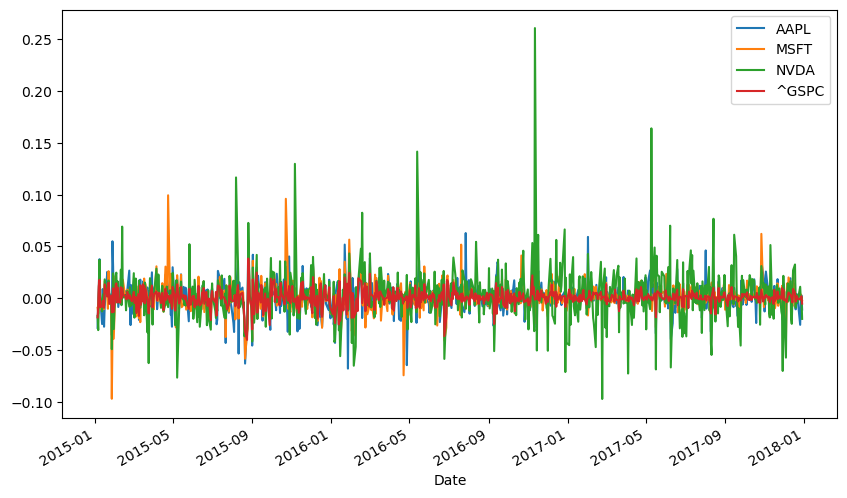

In [42]:
rall.plot(figsize=(10,6))

Notar que, en efecto, las diferencias entre $R_t$ y $r_t$ son muy pequeñas...

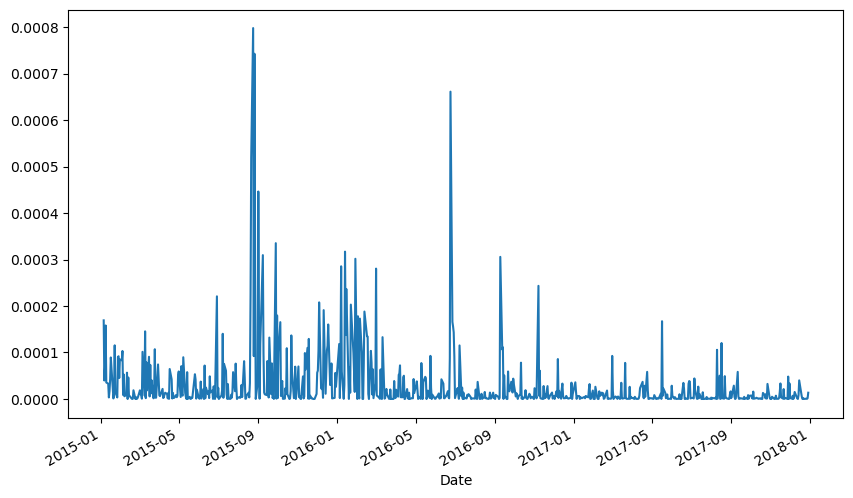

In [43]:
np.abs(rall-Rall1)['^GSPC'].plot(figsize=(10,6));

Escribamos funciones que devuelva los rendimientos diarios (simples y continuamente compuestos), dado un DataFrame de precios...

In [44]:
#rendimientos diarios simples
def simple_daily_ret(closes):
    return closes.pct_change(1).iloc[1:]

def log_dailiy_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

## ¿Porqué es más usado los rendimientos logarítmicos?

1. **log-normalidad**: si asumimos que los precios se distribuyen log-normalmente, entonces $log( 1 + r_i )$ se distribuye normalmente, lo cual es muy útil ya que muchos teoremas se supone normalidad.
2. Característica más importante es que son **aditivos en el tiempo.**  El producto de variables normalmente distribuidas no es una variable normal. Sin embargo la suma de variables normales no correlacionadas, sí que vuelve a ser una variable normal.
3. la **estabilidad numérica;** la adición de pequeñas cantidades es numéricamente fuerte, mientras que la multiplicación de números pequeños está sujeta a desbordamiento aritmético.

## 4. Gráficos útiles de los rendimientos

Tomemos como ejemplo la serie de precios de cierre de Microsoft y veamos (al menos gráficamente) si los rendimientos si son un proceso estocástico estacionario...

In [45]:
msftAC = closes['MSFT']
msftAC

Date
2015-01-02    40.534851
2015-01-05    40.162098
2015-01-06    39.572620
2015-01-07    40.075401
2015-01-08    41.254353
                ...    
2017-12-22    79.980324
2017-12-26    79.877434
2017-12-27    80.167358
2017-12-28    80.176704
2017-12-29    80.008347
Name: MSFT, Length: 755, dtype: float64

In [46]:
Rmsft = simple_daily_ret(msftAC)

In [47]:
short_rollmean_Rmsft = Rmsft.rolling(window=20).mean()
long_rollmean_Rmsft = Rmsft.rolling(window=100).mean()
short_rollstd_Rmsft = Rmsft.rolling(window=20).std()
long_rollstd_Rmsft = Rmsft.rolling(window=100).std()

In [29]:
%matplotlib notebook

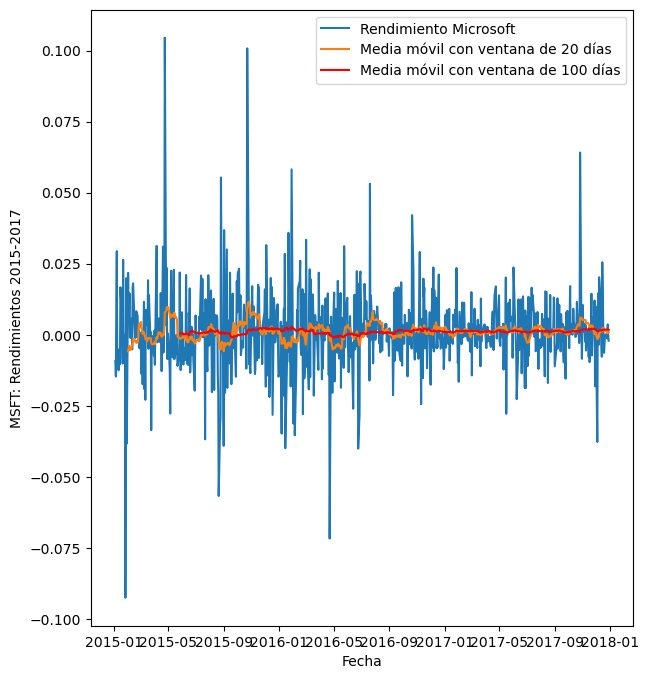

In [48]:
fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(short_rollmean_Rmsft.index, short_rollmean_Rmsft, label = 'Media móvil con ventana de 20 días')
ax.plot(long_rollmean_Rmsft.index, long_rollmean_Rmsft, 'r', label = 'Media móvil con ventana de 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

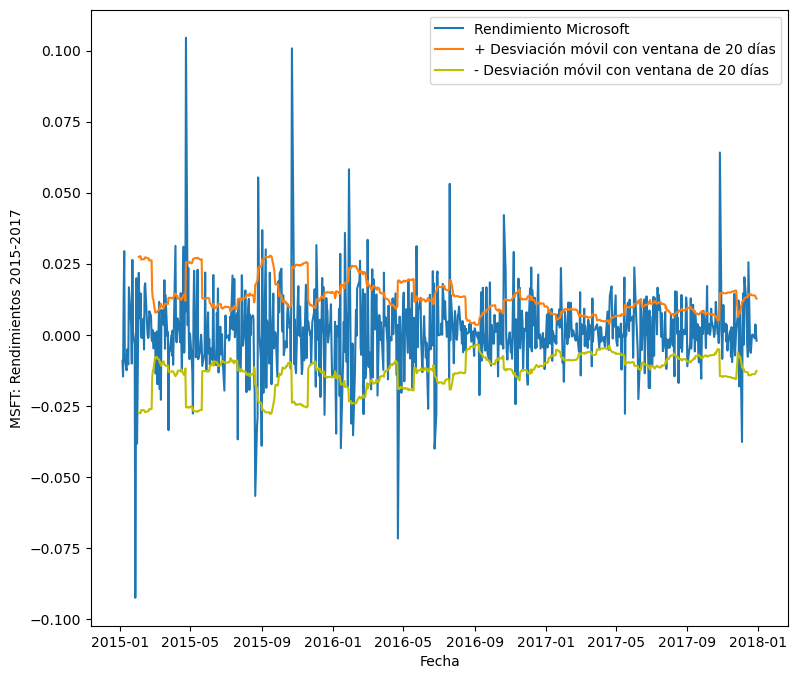

In [49]:
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(short_rollstd_Rmsft.index, short_rollstd_Rmsft, label = '+ Desviación móvil con ventana de 20 días')
ax.plot(short_rollstd_Rmsft.index, -short_rollstd_Rmsft, 'y', label = '- Desviación móvil con ventana de 20 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

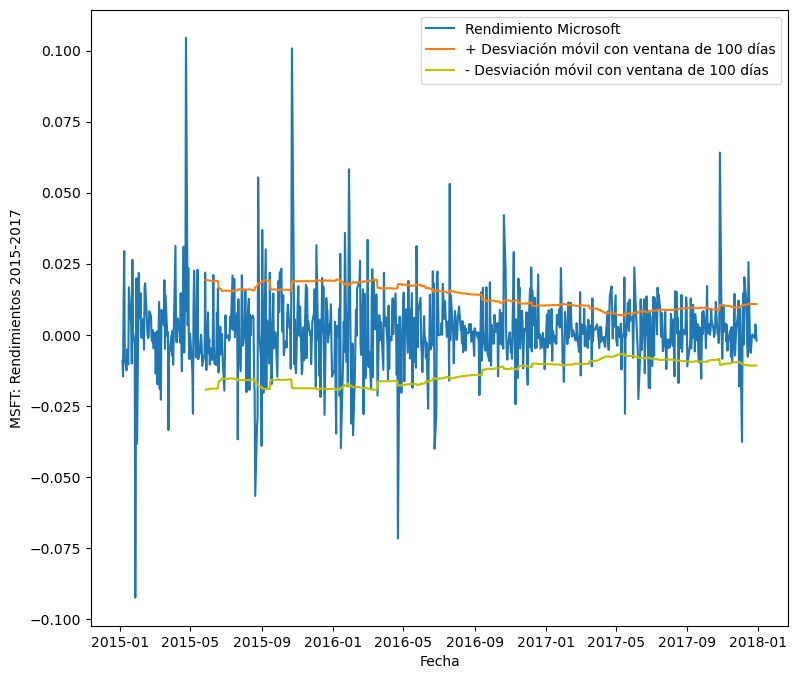

In [50]:
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(long_rollstd_Rmsft.index, long_rollstd_Rmsft, label = '+ Desviación móvil con ventana de 100 días')
ax.plot(long_rollstd_Rmsft.index, -long_rollstd_Rmsft, 'y', label = '- Desviación móvil con ventana de 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

<Axes: >

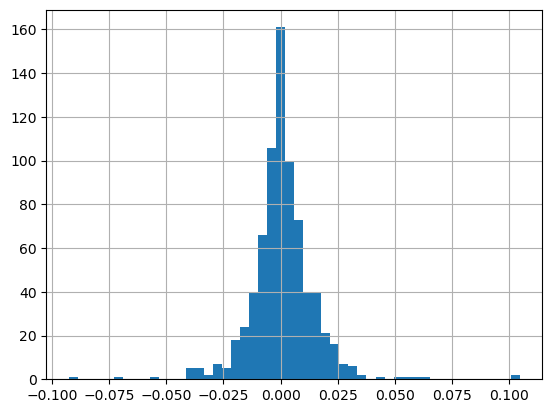

In [53]:
Rmsft.hist(bins=50)

In [36]:
%matplotlib inline

No es estacionario...

Justificar simulación.

Se puede verificar también con un gráfico cuantil-cuantil (qq plot)

In [54]:
stats.t.fit(Rmsft)[:-2]

(2.689281107760579,)

In [ ]:
stats.lo

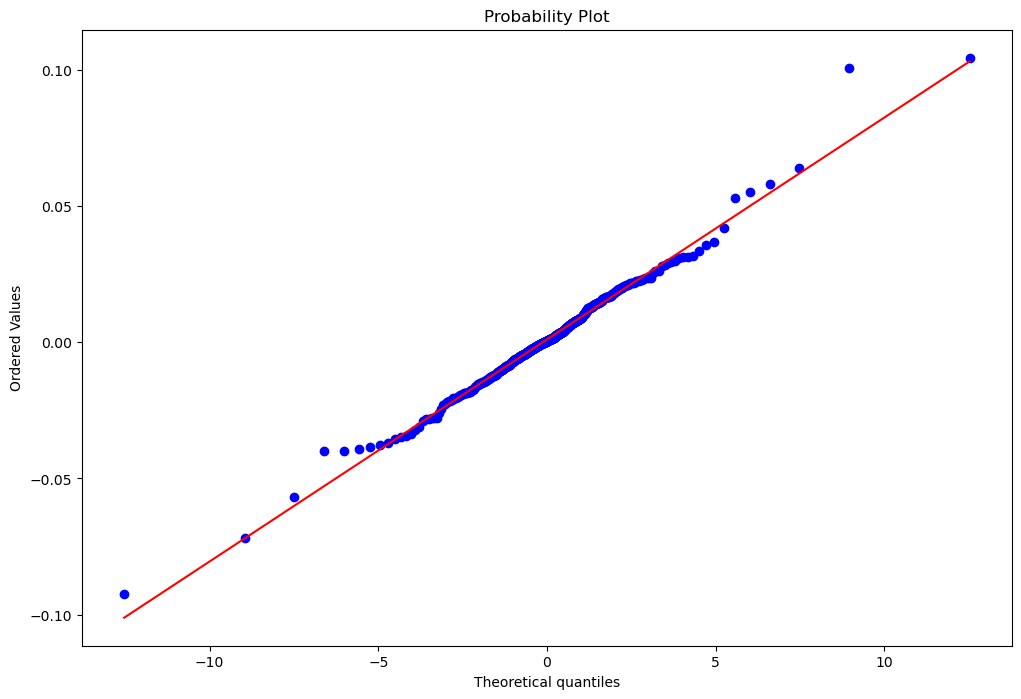

In [59]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
dist = 't'
stats.probplot(Rmsft, dist=getattr(stats,dist), 
               sparams=(getattr(stats, dist).fit(Rmsft)[:-2]), plot=ax);

## Está parte la voy a dejar como opcional, debido al tiempo que tenemos pero es muy interesante lo que acá se muestra, para los interesados echarle un ojo. Ahora saltamos a nuestro cuaderno de python de la clase 22.

Una más, con la librería seaborn... También se pueden instalar paquetes de python desde jupyter, usando el comando `!python -m pip install <package>`, como se ilustra a continuación

In [1]:
!python -m conda install seaborn

Solving environment: done

# All requested packages already installed.



In [41]:
import seaborn as sns

Otra manera de instalar una librería, es usar el método clásico de *Anaconda prompt* usando el comando `conda install -c anaconda seaborn`

/Users/odjaramilloz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/odjaramilloz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/odjaramilloz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

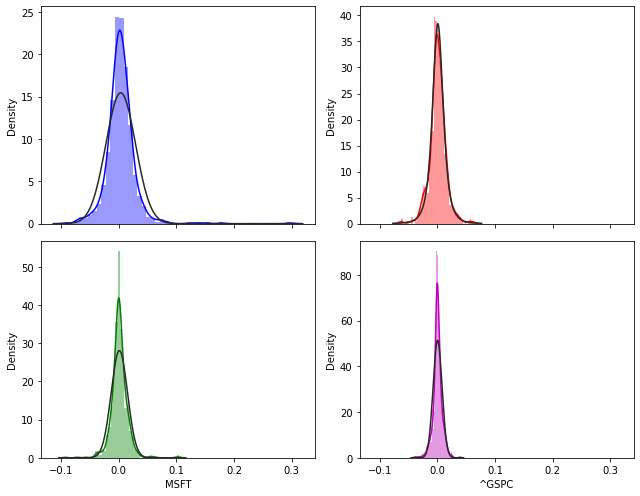

In [43]:
f, axes = plt.subplots(2, 2, figsize=(9, 7), sharex=True)
# Plot a simple histogram with binsize determined automatically
sns.distplot(Rall1.loc[:,'NVDA'], color="b", fit=stats.norm, norm_hist=True, ax=axes[0, 0])
sns.distplot(Rall1.loc[:,'AAPL'], color="r", fit=stats.t, norm_hist=True, ax=axes[0, 1])
sns.distplot(Rall1.loc[:,'MSFT'], color="g", fit=stats.norm, norm_hist=True, ax=axes[1, 0])
sns.distplot(Rall1.loc[:,'^GSPC'], color="m", fit=stats.norm, norm_hist=True, ax=axes[1, 1])
plt.tight_layout()

## 5. Gráficos de correlación

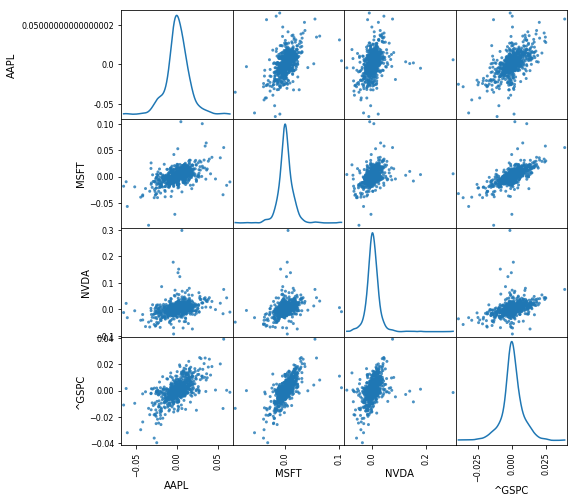

In [37]:
import pandas.plotting as cor
cor.scatter_matrix(Rall, diagonal='kde', alpha=0.8, figsize=(8,8));
# pd.tools.plotting.scatter_matrix(Rall, diagonal='kde', alpha=0.5, figsize=(8,8));

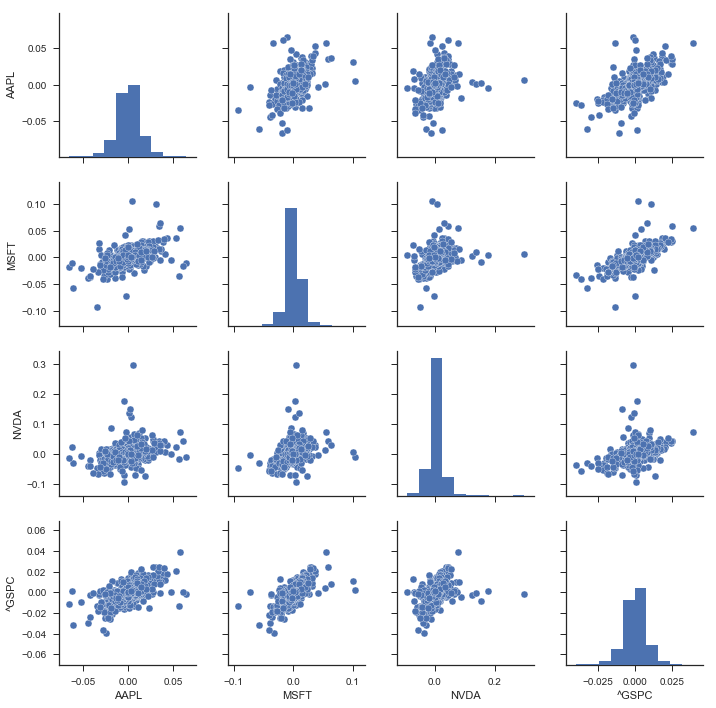

In [38]:
sns.set(style="ticks")
sns.pairplot(Rall);

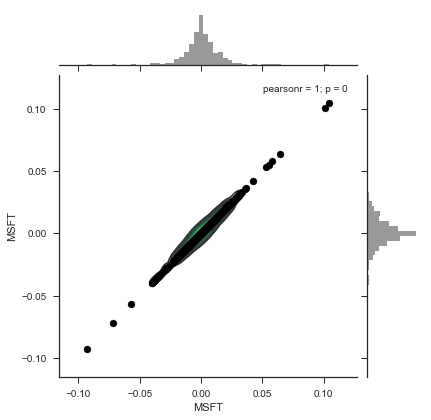

In [48]:
sns.jointplot("MSFT", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

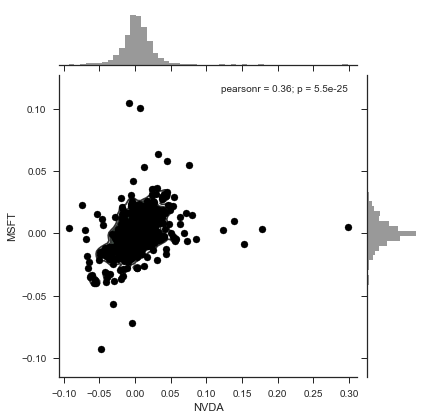

In [49]:
sns.jointplot("NVDA", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

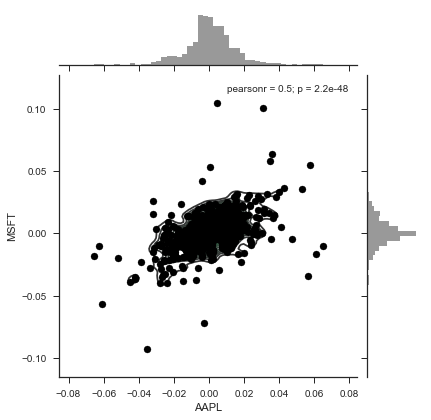

In [67]:
sns.jointplot("AAPL", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

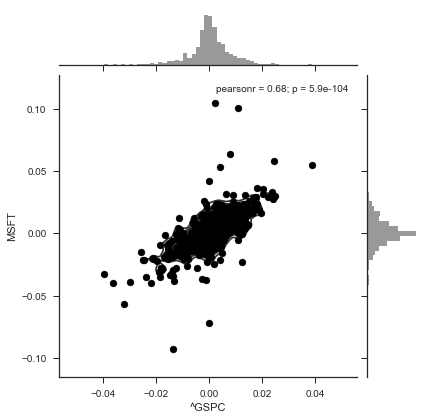

In [68]:
sns.jointplot("^GSPC", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

In [44]:
Rall1.corr()

Symbols,AAPL,MSFT,NVDA,^GSPC
Symbols,,,,
AAPL,1.000000,0.497449,0.328940,0.602271
MSFT,0.497449,1.000000,0.363636,0.681244
NVDA,0.328940,0.363636,1.000000,0.397680
^GSPC,0.602271,0.681244,0.397680,1.000000


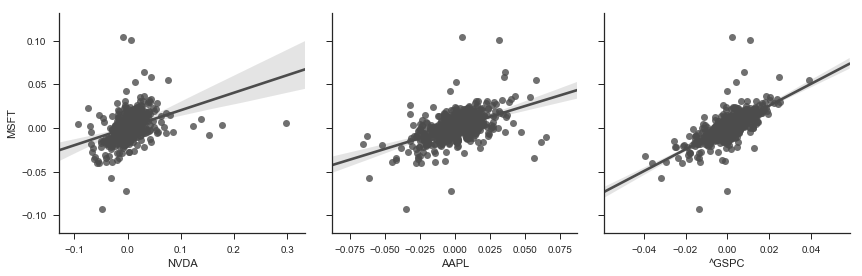

In [40]:
g = sns.PairGrid(Rall, y_vars=["MSFT"], x_vars=["NVDA", "AAPL", "^GSPC"], size=4)
g.map(sns.regplot, color=".3");

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar Jaramillo Z.
</footer>